# Question 1
### Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

- Data Description:
- Murder -- Muder rates in different places of United States
- Assualt- Assualt rate in different places of United States
- UrbanPop - urban population in different places of United States
- Rape - Rape rate in different places of United States


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random,float,array
import numpy as np
import seaborn as sns

C:\Users\ankit\AppData\Local\Temp/ipykernel_9268/3355710835.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from numpy import random,float,array


In [2]:
crime=pd.read_csv("D:\\Data Science\\Assignment 7\\Raw Material\\crime_data.csv")

In [3]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
crime.shape

(50, 5)

In [5]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [6]:
df_norm=norm_func(crime.iloc[:,1:])
df_norm.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.360000
std,0.262380,0.285403,0.245335,0.242025
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.200904
50%,0.388554,0.390411,0.576271,0.330749
75%,0.629518,0.698630,0.775424,0.487726
max,1.000000,1.000000,1.000000,1.000000


In [7]:
from scipy.cluster.hierarchy import linkage

import scipy.cluster.hierarchy as sch

In [8]:
z=linkage(df_norm,method="complete",metric="euclidean")

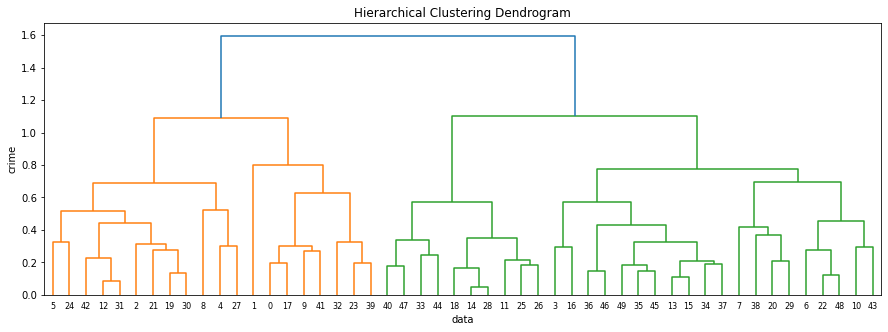

In [9]:
plt.figure(figsize=(15,5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('data')
plt.ylabel('crime')
sch.dendrogram(z,leaf_rotation=0.,leaf_font_size=8.,)
plt.show()

In [10]:
crime.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
crime_subset = pd.DataFrame(scaler.fit_transform(crime.iloc[:,1:]))
crime_subset

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


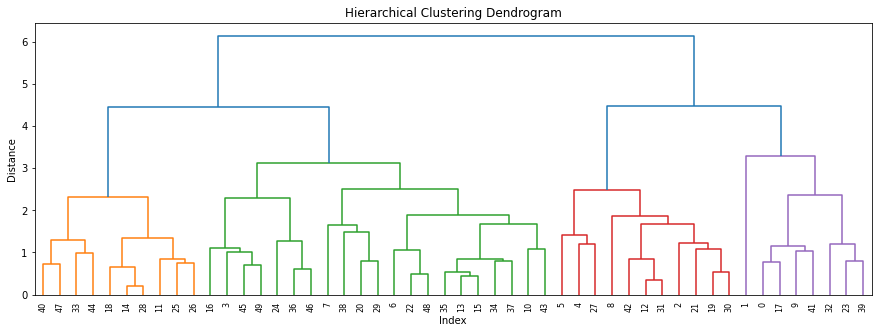

In [12]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(crime_subset, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [13]:
k=list(range(2,5))

In [14]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np

C:\Users\ankit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


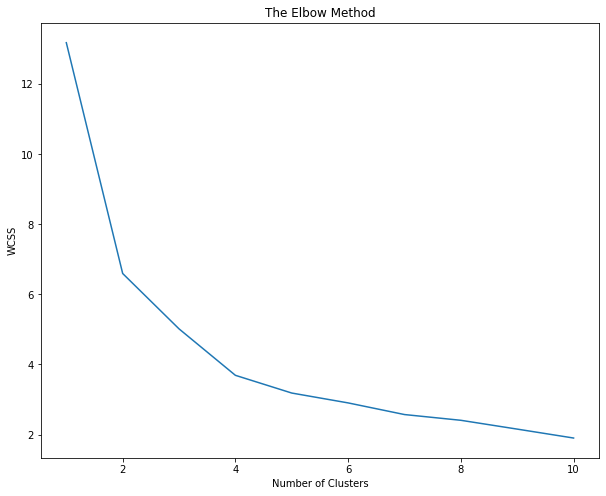

In [15]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [16]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(df_norm)

In [17]:
y_kmeans
#clf.cluster_centers_
clf.labels_

array([4, 1, 1, 0, 1, 1, 2, 2, 1, 4, 2, 3, 1, 0, 3, 0, 0, 4, 3, 1, 2, 1,
       3, 4, 0, 3, 3, 1, 3, 2, 1, 1, 4, 3, 2, 0, 0, 2, 2, 4, 3, 4, 1, 2,
       3, 0, 2, 3, 3, 0])

In [18]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
crime['clust']=md # creating a  new column and assigning it to new column 
crime.describe()

,Murder,Assault,UrbanPop,Rape,clust
count,50.00000,50.000000,50.000000,50.000000,50.00000
mean,7.78800,170.760000,65.540000,21.232000,1.92000
std,4.35551,83.337661,14.474763,9.366385,1.33768
min,0.80000,45.000000,32.000000,7.300000,0.00000
25%,4.07500,109.000000,54.500000,15.075000,1.00000
50%,7.25000,159.000000,66.000000,20.100000,2.00000
75%,11.25000,249.000000,77.750000,26.175000,3.00000
max,17.40000,337.000000,91.000000,46.000000,4.00000


In [19]:
crime.iloc[:,1:7].groupby(crime.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,7.500000,148.000000,62.333333,20.955556,0.0
1,10.966667,264.000000,76.500000,33.608333,1.0
2,5.050000,136.700000,79.300000,17.590000,2.0
3,3.091667,76.000000,52.083333,11.833333,3.0
4,14.671429,251.285714,54.285714,21.685714,4.0


Text(0.5, 1.0, 'Clusters using KMeans')

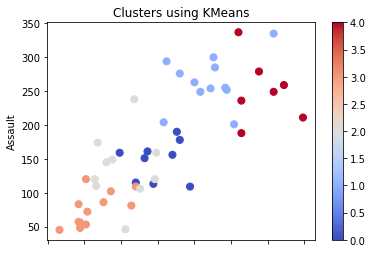

In [20]:
crime.plot(x="Murder",y ="Assault",c=clf.labels_,kind="scatter",s=50 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

Text(0.5, 1.0, 'Clusters using KMeans')

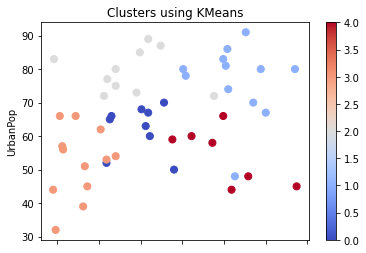

In [21]:
crime.plot(x ="Assault",y="UrbanPop",c=clf.labels_,kind="scatter",s=50 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

Text(0.5, 1.0, 'Clusters using KMeans')

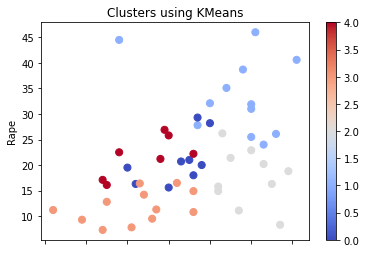

In [22]:
crime.plot(x ="UrbanPop",y="Rape",c=clf.labels_,kind="scatter",s=50 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

Text(0.5, 1.0, 'Clusters using KMeans')

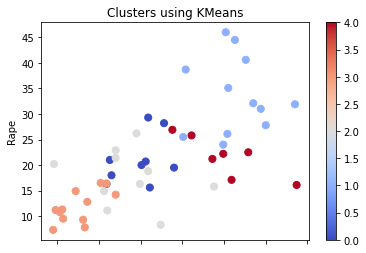

In [23]:
crime.plot(x ="Assault",y="Rape",c=clf.labels_,kind="scatter",s=50 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

In [24]:
clf.inertia_

3.206293862369271

In [25]:
WCSS

[13.184122550256443,
 6.596893867946198,
 5.0163889246906725,
 3.690820410392112,
 3.185021932472434,
 2.9034793728430452,
 2.5711632019508395,
 2.40734587399574,
 2.1556607938272636,
 1.9010691447373156]